# Clustering
-  Group the data based on similarities 
-  How many group, How grouping is done

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [3]:
#options
# https://pandas.pydata.org/docs/user_guide/options.html
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option("expand_frame_repr", True)
pd.set_option("max_info_columns", 11)
pd.set_option("display.precision", 3)
pd.set_option('display.width', 1000)  #wrap with full display
import warnings
warnings.filterwarnings('ignore')

In [4]:
#data
df = pd.read_csv('../data/trg/hrAttrition.csv')
print(df.shape, '\n', df.columns.tolist(),'\n')
print(df.dtypes, '\n', df.iloc[:,[0,1,2]].head())
#147- employees with 35 columns

(1470, 35) 
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatis

In [5]:
df1 = df.select_dtypes(include='number').copy()
df1.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='object')

In [6]:
selCols = ['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome']
df2 = df1[selCols].copy()
df2.head()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome
0,41,1,2,2,5993
1,49,8,1,2,5130
2,37,2,2,1,2090
3,33,3,4,1,2909
4,27,2,1,1,3468


In [7]:
#!pip install kneed
#!pip install dexplot

#install libraries if required
!pip install kneed

In [8]:
#group these cars
from sklearn.cluster import KMeans
#!pip install kneed
from kneed import KneeLocator
#from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2).round(2)
scaled_data[1:5]

array([[ 1.32, -0.15, -1.87, -0.06, -0.29],
       [ 0.01, -0.89, -0.89, -0.96, -0.94],
       [-0.43, -0.76,  1.06, -0.96, -0.76],
       [-1.09, -0.89, -1.87, -0.96, -0.64]])

In [10]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=123)

In [11]:
kmeans.fit(scaled_data)

KMeans(init='random', n_clusters=3, n_init=10, random_state=123)

In [12]:
print('Lowest SSE ', kmeans.inertia_)

Lowest SSE  4041.3373679850165


In [13]:
print('Final locations of the centroid' )
kmeans.cluster_centers_   #these scaled values of   mt[['am','mpg','wt','hp','gear']]

Final locations of the centroid


array([[ 1.01556701, -0.12635739,  0.15731959,  1.60463918,  1.68546392],
       [-0.27846604, -0.52010539, -0.03345433, -0.4408548 , -0.44940281],
       [-0.17876923,  1.47990769, -0.04556923, -0.27732308, -0.32867692]])

In [14]:
print('Final locations of the centroid' )
kmeans.cluster_centers_   #these scaled values of   mt[['am','mpg','wt','hp','gear']]

Final locations of the centroid


array([[ 1.01556701, -0.12635739,  0.15731959,  1.60463918,  1.68546392],
       [-0.27846604, -0.52010539, -0.03345433, -0.4408548 , -0.44940281],
       [-0.17876923,  1.47990769, -0.04556923, -0.27732308, -0.32867692]])

In [15]:
kmeans.predict(scaled_data)

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
type(kmeans.predict(scaled_data))

numpy.ndarray

In [17]:
df2['cluster'] = kmeans.predict(scaled_data)
df2.head()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,cluster
0,41,1,2,2,5993,1
1,49,8,1,2,5130,1
2,37,2,2,1,2090,1
3,33,3,4,1,2909,1
4,27,2,1,1,3468,1


In [18]:
df2.groupby('cluster').agg({'Age':[np.mean, np.std], 'DistanceFromHome':[np.mean, np.min, np.max], 'Education':[np.mean, np.min, np.max], 'JobLevel':[np.mean, np.min, np.max], 'MonthlyIncome':[np.mean, np.min, np.max]})

Age        DistanceFromHome         Education         JobLevel         MonthlyIncome             
           mean    std             mean min max      mean min max     mean min max          mean   min    max
cluster                                                                                                      
0        46.199  7.054            8.168   1  29     3.072   1   5    3.838   3   5     14434.725  7260  19999
1        34.383  8.056            4.975   1  14     2.877   1   5    1.576   1   3      4388.566  1009  12808
2        35.295  8.126           21.191  13  29     2.865   1   5    1.757   1   3      4956.828  1091  12504

In [19]:
df2.agg(np.std)

Age                    9.135
DistanceFromHome       8.107
Education              1.024
JobLevel               1.107
MonthlyIncome       4707.957
cluster                0.647
dtype: float64

In [20]:
#!pip install yellowbrick

In [21]:
#how to select number of clusters
from yellowbrick.cluster.elbow import kelbow_visualizer
#!pip install yellowbrick
#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#quick-method

In [22]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

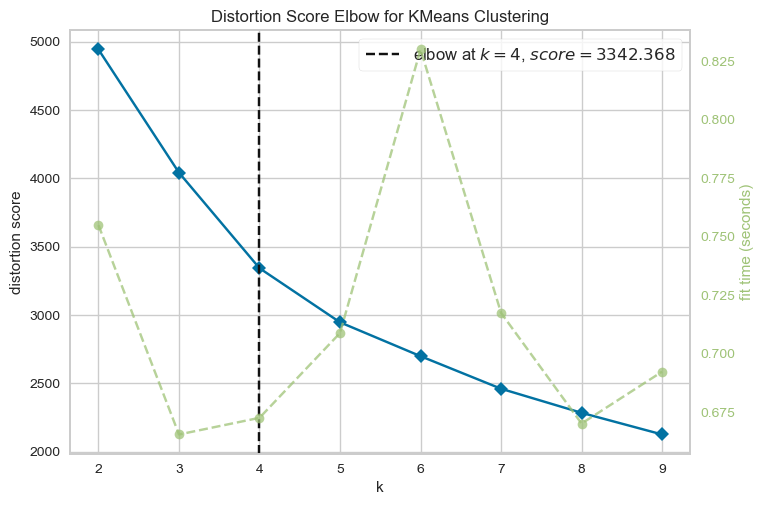

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [23]:
# k is range of number of clusters.
#error due to memory leans 
kelbow_visualizer(KMeans(random_state=4), scaled_data, k=(2,10), n_init=4, P_NUM_THREADS=1)
#https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am

In [24]:
kmeans4 = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=123)

In [25]:
kmeans4.fit(scaled_data)
print('Lowest SSE ', kmeans4.inertia_)
#earlier it was 57

Lowest SSE  3342.3841097593495


In [26]:
#anoterh way
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    Sum_of_squared_distances.append(km.inertia_)

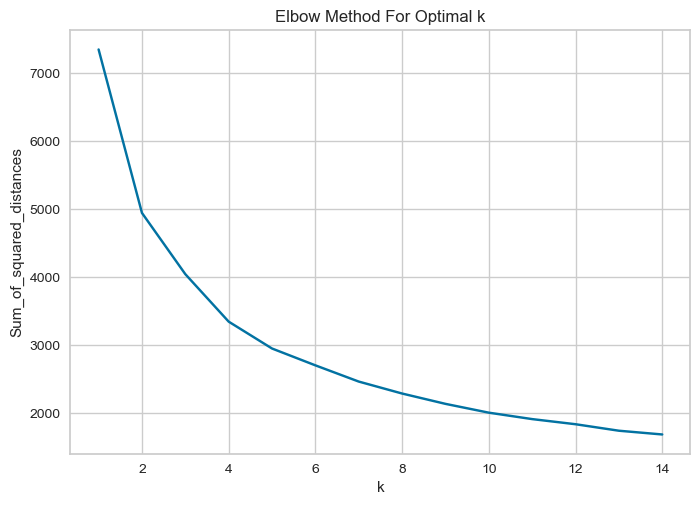

In [27]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show();
#here also it is showing 4 clusters

In [27]:
# Practise
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
    

## end here